# K-means clustering 3

## 클러스터링 결과 해석

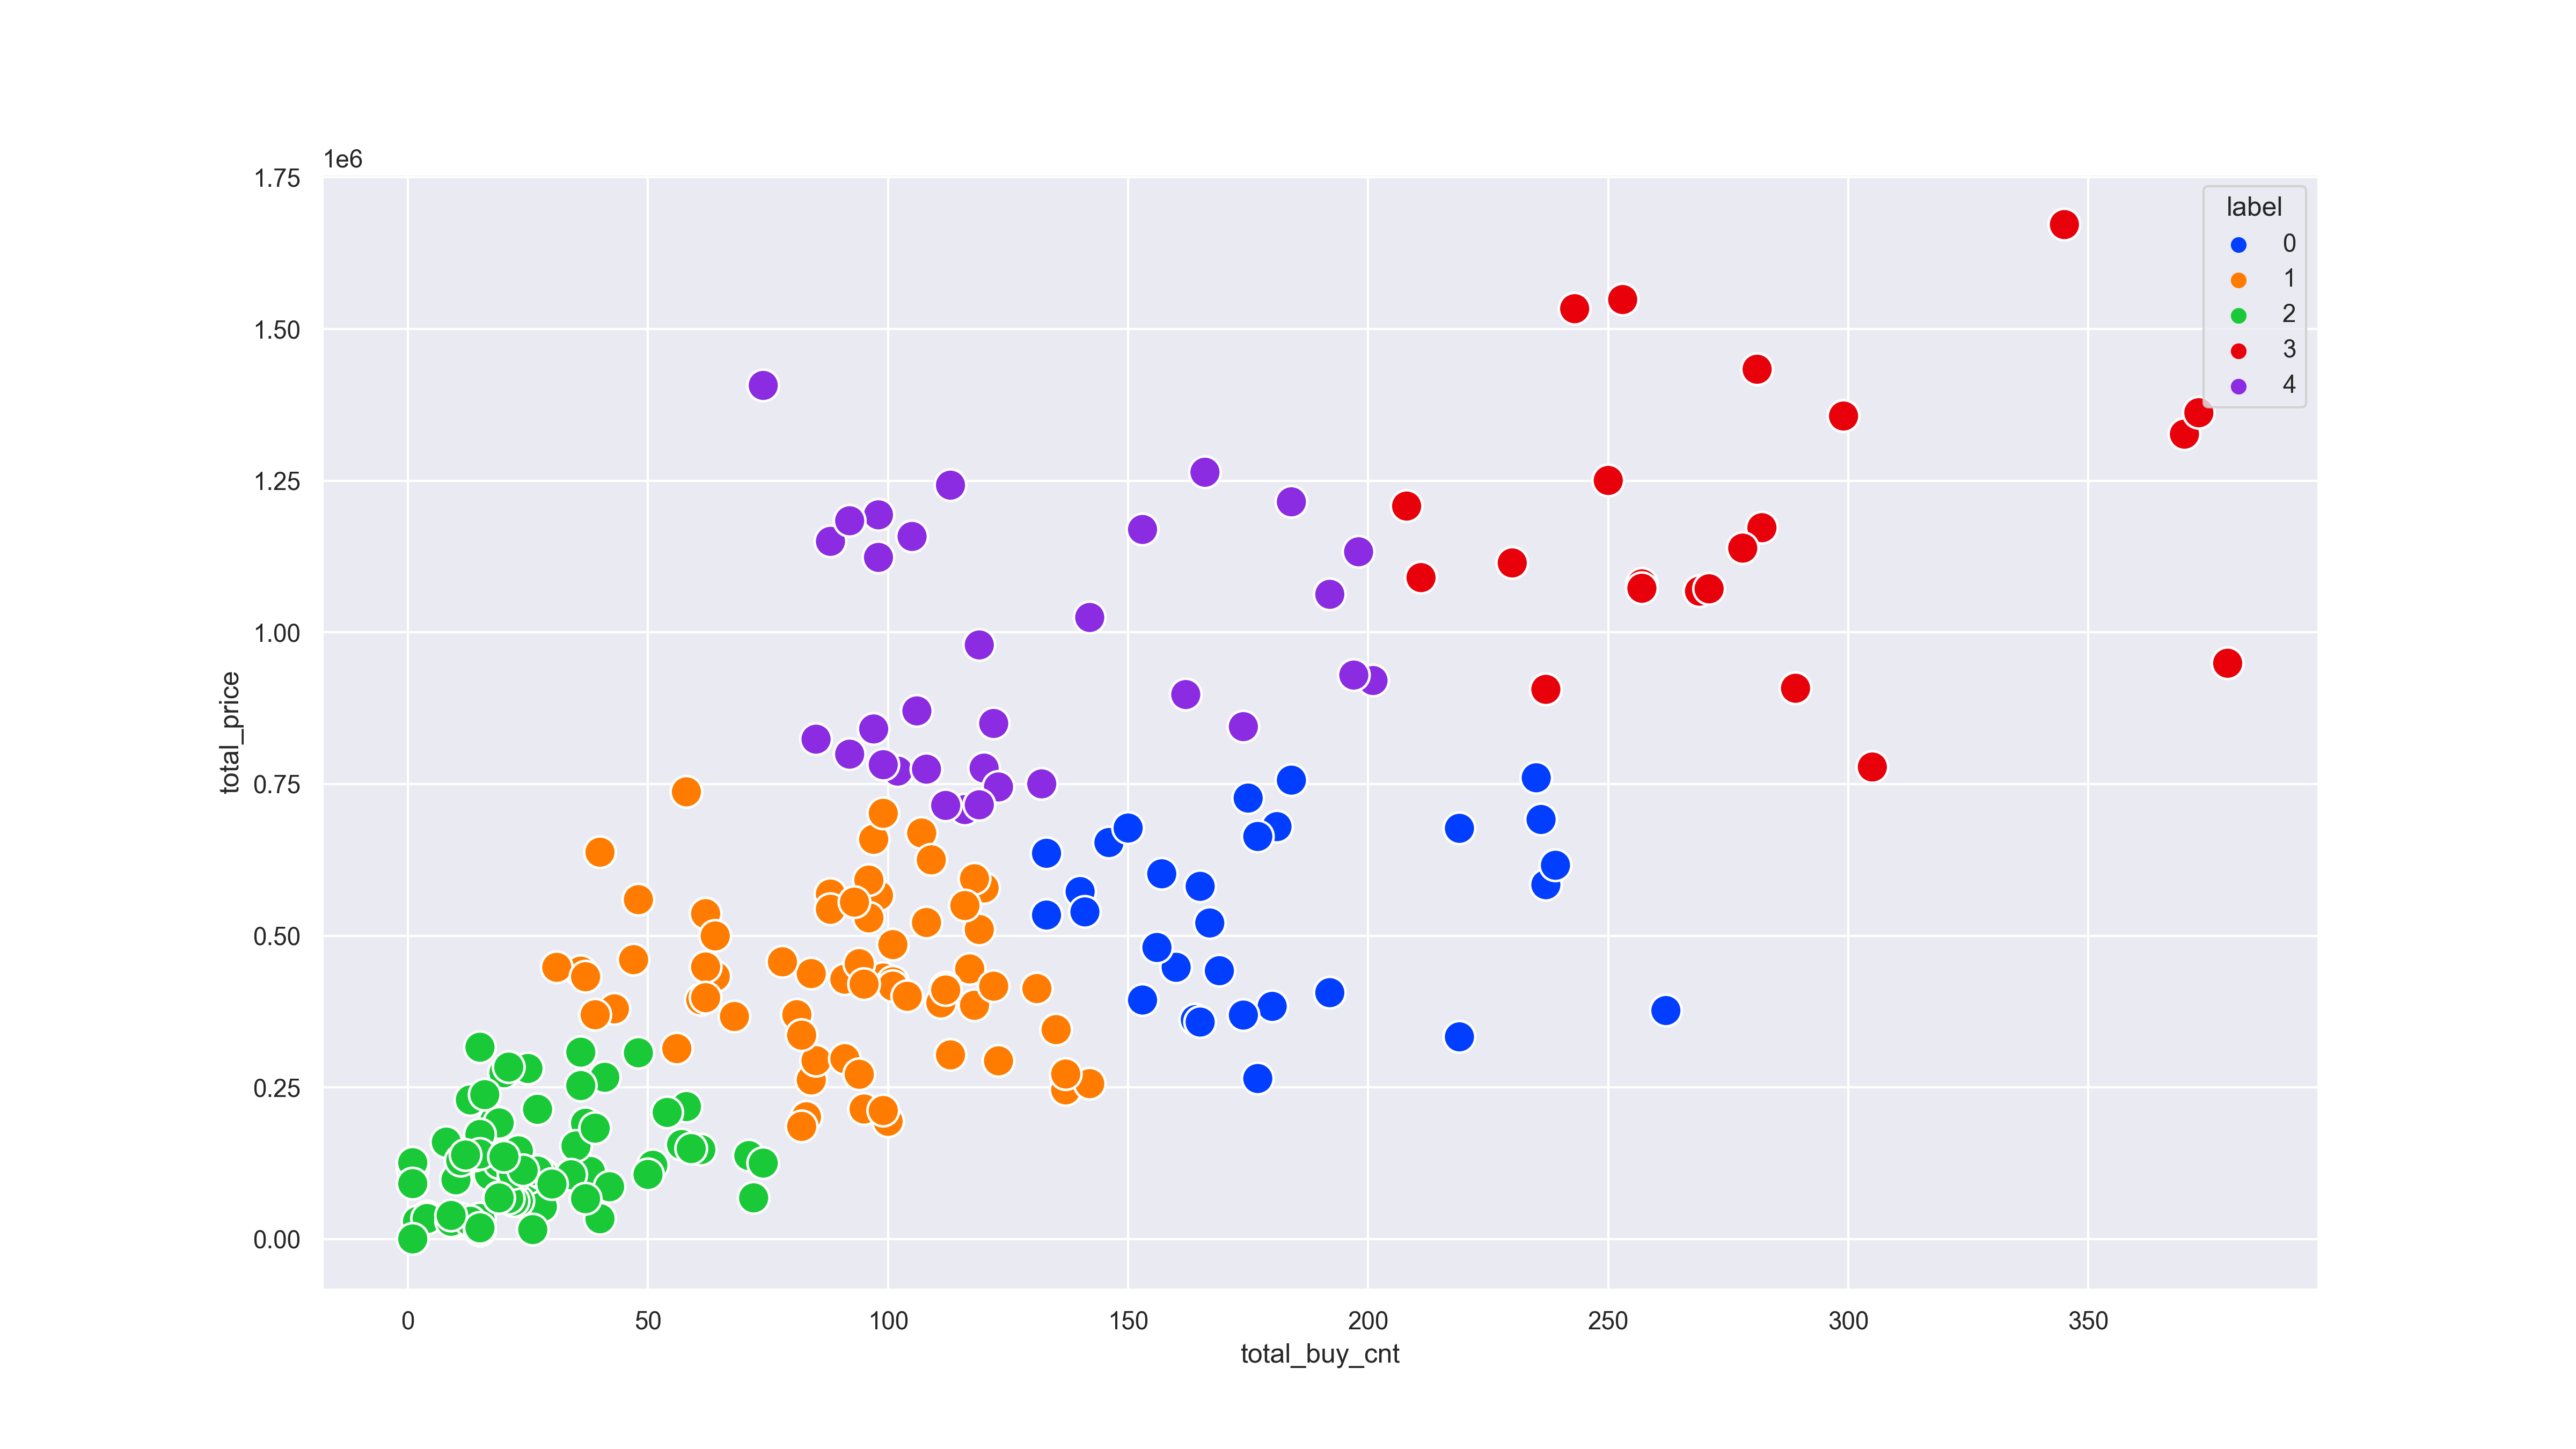

1. 다음과 같이 클러스터별 n 수를 확인해본다.<br>
```python
pd.DataFrame(sales_df['label'].value_counts())
```
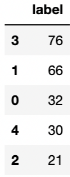

2. groupby()를 이용하여 클러스터별 특징을 살펴본다.<br>
```python
groupby_df = sales_df.groupby('label').mean()
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']
groupby_df
```
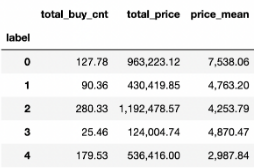

클러스터 2의 고객들은 총 구매 수량과 금액이 가장 많고 개당 구매 가격은 적은 편임을 확인할 수 있다. 따라서 클러스터 2의 고객들은 가격이 낮은 물품을 많이 구매한다는 특징이 있는 걸로 해석할 수 있다.

클러스터 0의 고객들은 총 구매 수량이 많은 편은 아니지만, 구매한 품목의 평균 금액은 높은 편이다. 클러스터 2와 반대로 수량은 많지 않지만 비싼 물품을 사는 고객들이라는 걸 알 수 있다.

결과를 바탕으로 고객 클러스터별 특징에 따라 맞춤 전략을 짤 수 있다. 저렴한 물품을 여러 번 구매하면 사은품을 주는 행사는 2번 클러스터 고객들에게, 가격이 높은 제품의 할인 프로모션은 0번 클러스터 고객들에게 진행하는 것을 고려해볼 수 있다.

## K-Means clustering의 장단점

* 장점
    1. 사용방법이 쉽고 해석이 용이하다.<br>
* 단점
    1. 최적의 k를 정하는 것이 어렵다.
    2. 이상치에 영향을 많이 받는다.
    3. 초기 centroid 위치에 따라 결과가 달라진다. 
    -> 데이터들 간의 거리를 반영하여 전략적으로 초기 Centroid 위치를 찾아 주는 과정을 추가한 k-means++ 모델로 개선

k-means++ 모델은 다음과 같이 사용할 수 있다.
```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, init='k-means++')
```